<a href="https://colab.research.google.com/github/Amansingh1202/BookRating/blob/master/Keras/reuters_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q keras

In [ ]:
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)

In [ ]:
print(train_labels)

[ 3  4  3 ... 25  3 25]


In [ ]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [ ]:
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train=x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 160us/step - loss: 2.6749 - accuracy: 0.4327 - val_loss: 1.7999 - val_accuracy: 0.6370
Epoch 2/20
7982/7982 [==============================] - 1s 120us/step - loss: 1.4869 - accuracy: 0.6962 - val_loss: 1.3541 - val_accuracy: 0.6980
Epoch 3/20
7982/7982 [==============================] - 1s 119us/step - loss: 1.1072 - accuracy: 0.7658 - val_loss: 1.1716 - val_accuracy: 0.7450
Epoch 4/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.8776 - accuracy: 0.8126 - val_loss: 1.0627 - val_accuracy: 0.7680
Epoch 5/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.7010 - accuracy: 0.8524 - val_loss: 0.9920 - val_accuracy: 0.7930
Epoch 6/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.5595 - accuracy: 0.8861 - val_loss: 0.9537 - val_accuracy: 0.7910
Epoch 7/20
7982/7982 [==============================] - 1s 119us/step - loss

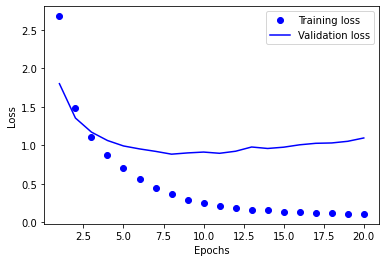

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

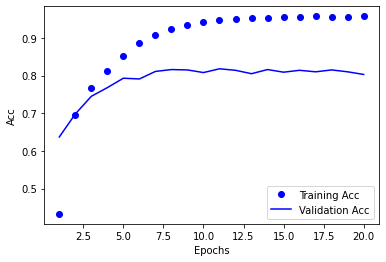

In [ ]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,len(loss)+1)
plt.plot(epochs,acc,'bo',label='Training Acc')
plt.plot(epochs,val_acc,'b',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [ ]:
model.fit(x_train,one_hot_train_labels,epochs=8,batch_size=512,validation_data=(x_val,y_val))

Train on 8982 samples, validate on 1000 samples
Epoch 1/8
8982/8982 [==============================] - 1s 128us/step - loss: 0.2177 - accuracy: 0.9405 - val_loss: 0.6232 - val_accuracy: 0.8780
Epoch 2/8
8982/8982 [==============================] - 1s 125us/step - loss: 0.1638 - accuracy: 0.9489 - val_loss: 0.4207 - val_accuracy: 0.9180
Epoch 3/8
8982/8982 [==============================] - 1s 125us/step - loss: 0.1445 - accuracy: 0.9503 - val_loss: 0.2900 - val_accuracy: 0.9340
Epoch 4/8
8982/8982 [==============================] - 1s 129us/step - loss: 0.1320 - accuracy: 0.9509 - val_loss: 0.2533 - val_accuracy: 0.9360
Epoch 5/8
8982/8982 [==============================] - 1s 126us/step - loss: 0.1227 - accuracy: 0.9539 - val_loss: 0.2018 - val_accuracy: 0.9530
Epoch 6/8
8982/8982 [==============================] - 1s 124us/step - loss: 0.1138 - accuracy: 0.9547 - val_loss: 0.2041 - val_accuracy: 0.9580
Epoch 7/8
8982/8982 [==============================] - 1s 123us/step - loss: 0.116

In [ ]:
results = model.evaluate(x_test,one_hot_test_labels)

2246/2246 [==============================] - 0s 117us/step


In [ ]:
predictions = model.predict(x_test)

In [ ]:
np.argmax(predictions[0])

3